In [8]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
from matplotlib_venn import venn3
from venn import venn
%matplotlib inline

import seaborn as sns

from utils import prepare_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
df = prepare_df()
df.head()

,period_end_date,translated_when,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
0,NaT,2020-10-15 06:58:28+00:00,0,426,121.0,NaN,2,96,111,1.0,1
1,NaT,2020-10-15 06:38:34+00:00,0,426,NaN,NaN,2,92,95,0.0,1
2,2020-09-20,2020-09-23 12:27:51+00:00,0,426,121.0,42730.0,2,30,37,1.0,1
3,2020-09-20,2020-09-23 12:26:41+00:00,0,426,121.0,42730.0,2,92,203,1.0,1
4,2020-09-20,2020-09-22 09:40:36+00:00,0,426,121.0,50128.0,2,9,31,1.0,1


In [10]:
df.corr()

,if_data_corrected,prod_gr_id,country_id_n,delivery_type_id,freq_id,retailer_id,brand_id,predict_automatch,class_acctual
if_data_corrected,1.000000,0.089330,-0.017052,-0.035232,-0.006297,0.004517,0.019977,0.019205,0.005050
prod_gr_id,0.089330,1.000000,-0.381452,-0.011813,0.000779,-0.013677,-0.055860,0.010704,-0.009179
country_id_n,-0.017052,-0.381452,1.000000,0.092406,0.000530,0.011723,0.029348,0.014746,0.012591
delivery_type_id,-0.035232,-0.011813,0.092406,1.000000,0.012468,-0.001032,-0.005304,0.005820,-0.004141
freq_id,-0.006297,0.000779,0.000530,0.012468,1.000000,-0.232220,-0.441475,-0.018159,-0.005342
retailer_id,0.004517,-0.013677,0.011723,-0.001032,-0.232220,1.000000,0.351083,0.018378,0.003737
brand_id,0.019977,-0.055860,0.029348,-0.005304,-0.441475,0.351083,1.000000,0.011268,0.013937
predict_automatch,0.019205,0.010704,0.014746,0.005820,-0.018159,0.018378,0.011268,1.000000,0.505836
class_acctual,0.005050,-0.009179,0.012591,-0.004141,-0.005342,0.003737,0.013937,0.505836,1.000000


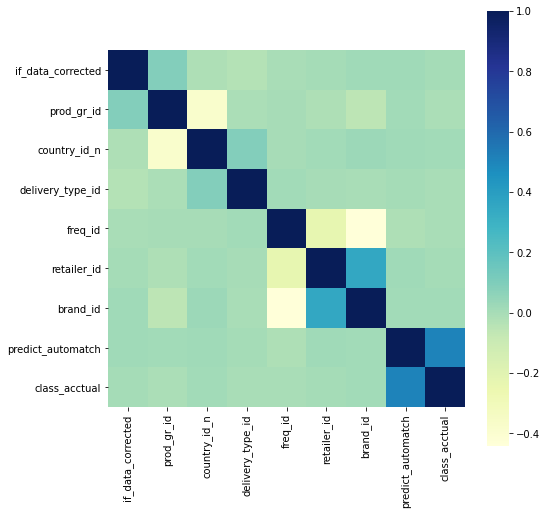

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.color_palette("pastel")
sns.heatmap(df.corr(), ax=ax, square=True, cmap="YlGnBu")
plt.savefig('../pics/corr_matrix.png')
plt.show()

In [5]:
df.columns

Index(['period_end_date', 'translated_when', 'if_data_corrected', 'prod_gr_id',
       'country_id_n', 'delivery_type_id', 'freq_id', 'retailer_id',
       'brand_id', 'predict_automatch', 'class_acctual'],
      dtype='object')

In [ ]:
columns = ['period_end_date', 'translated_when', 'if_data_corrected', 'prod_gr_id',
       'country_id_n', 'delivery_type_id', 'freq_id', 'retailer_id',
       'brand_id', 'predict_automatch', 'class_acctual']

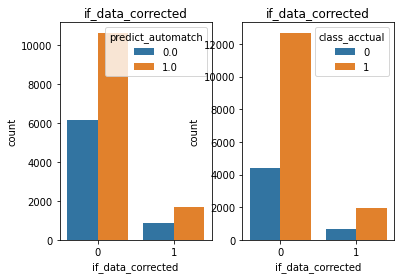

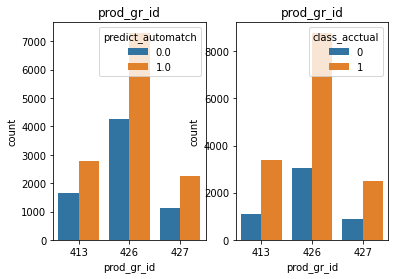

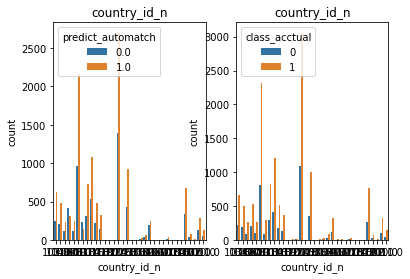

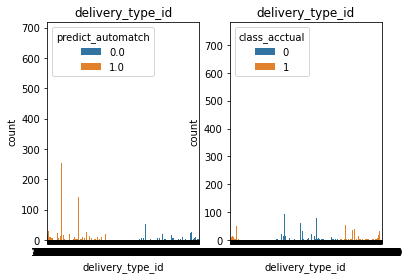

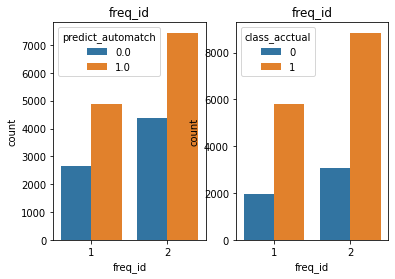

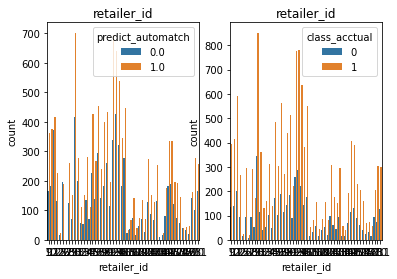

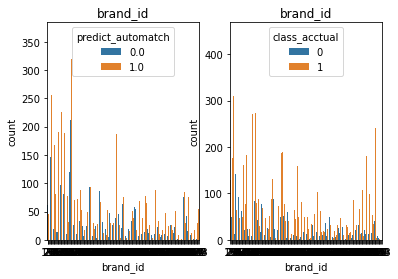

In [7]:
for column in ['if_data_corrected', 'prod_gr_id', 'country_id_n', 'delivery_type_id', 'freq_id', 'retailer_id', 'brand_id']:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.set_title(column)
    ax2.set_title(column)
    sns.countplot(x=column, hue='predict_automatch', data=df, ax=ax1)
    sns.countplot(x=column, hue='class_acctual', data=df, ax=ax2)
plt.show()

In [ ]:
sns.pairplot(df[['if_data_corrected', 'prod_gr_id', 'country_id_n', 'delivery_type_id', 'freq_id', 'retailer_id', 'brand_id']], 
             hue='class_acctual',
             palette='pastel')
plt.savefig('../pics/pp_hue_class_actual.png')